<a href="https://colab.research.google.com/github/yaffka/DP/blob/main/PD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
#import itertools


In [10]:
def fpKa (G, root):
 df=pd.read_csv(root)
 cols = len(df.axes[1])
 pKas = np.zeros((len(df)-1, cols))
 rows = len(df.axes[0])
 for m in range(cols):
    for i in range(rows-1):
       pKa = ((df.iloc[:, m][i+1]-df.iloc[:, m][i])*627.509+G)/1.364494722
       pKas[i,m] = pKa   
 pKas = pd.DataFrame(pKas)
 return (pKas)

In [11]:
def style(ax):
   x_fill = [0.0,14.0,14.0,0.0]
   y_fill = [-2, -2, 1.5, 1.5]
   y2_fill = [0,-0.83,0.40,1.23]
   ax.fill(x_fill,y_fill,color='gray',alpha=0.1)
   ax.fill(x_fill,y2_fill,color='gray',alpha=0.1)
   plt.xlim([-1, 15]) 
   plt.ylim([-2, 1.5]) 
   plt.xlabel('pH',fontsize=14)
   plt.xticks(fontsize=14)
   plt.yticks(fontsize=14)
   plt.ylabel('E (V vs SHE)',fontsize=14)
   return()

In [14]:
def potentialf(G, SHE, root, pKas):
   def find(r, col, NaN, pkai):
     long = len(df.iloc[:,col])
     if r != long-1:
       NaN = str(pKas.iloc[r,col])
       pkai = pKas.iloc[r,col] 
       pkai = round(pkai, 2)

     sum =  df.iloc[r:,col].isnull().sum()
     Dat = r + sum + 1
     if NaN == "nan" and Dat != long:
       r +=1

     if pH == pkai and Dat != long:
       r +=1
     return(r) 
   # Intervalo de pH
   l=[]
   rows = len(pKas.axes[0])
   cols = len(pKas.axes[1])
   #print(rows, cols)

   for i in range(cols):
     k=0
     for k in range(rows):
       #print(k,i)
       m = pKas.iloc[k,i]
       if float(m) == m:
         l.append(m)

   vmax = int(np.max(l)+2)
   vmin = int(np.min(l)-2)
   #print(vmax, vmin)
   # analisis de datos
   df=pd.read_csv(root)
   pH=vmin
   r1=0
   r2=0
   r3=0 
   NaN=0
   pkai=0
   colums = len(df.axes[1])

   fig, ax = plt.subplots(figsize=(12,8))
   while pH < vmax:
     pH = round(pH,2)
     #print(pH, r1, r2, r3)
     if colums < 3:
       r1 = find(r1, 0, NaN, pkai)
       r2 = find(r2, 1, NaN, pkai)
       m=abs(r2-r1)
       E1 = ((df.iloc[r2,1]-df.iloc[r1,0])*4.3597447222071E-18 -m*G*6.95E-21)/(-1.602176634E-19)-SHE
       EQG1 = E1 - 0.059*m*pH
       #EQG1 = round(EQG1,3)
       plt.scatter(pH, EQG1 ,color="blue", s=0.1)

     else:
       r1 = find(r1, 0, NaN, pkai)
       r2 = find(r2, 1, NaN, pkai)
       r3 = find(r3, 2, NaN, pkai)

       m=abs(r2-r1)
       E1 = ((df.iloc[r2,1]-df.iloc[r1,0])*4.3597447222071E-18 -m*G*6.95E-21)/(-1.602176634E-19)-SHE
       EQG1 = E1 - 0.059*m*pH
       EQG1 = round(EQG1,3)

       m2=abs(r3-r2)
       E2 = ((df.iloc[r3,2]-df.iloc[r2,1])*4.3597447222071E-18 -m2*G*6.95E-21)/(-1.602176634E-19)-SHE
       EQG2 = E2 - 0.059*m2*pH
       EQG2 = round(EQG2, 3)

       if EQG1 < EQG2:
          m3=abs(r3-r1)
          E3 = ((df.iloc[r3,2]-df.iloc[r1,0])*4.3597447222071E-18 -m3*G*6.95E-21)/(-2*1.602176634E-19)-SHE
          EQG3 = E3 - 0.059*(m3/2)*pH
          plt.scatter(pH, EQG3 ,color="yellow", s=0.1)
       else:
          plt.scatter(pH, EQG1 ,color="blue", s=0.1)
          plt.scatter(pH, EQG2 ,color="black", s=0.1)
      
     pH = pH +0.01
   style(ax)
   plt.show()
   return(pH, r1, r2)

In [6]:
root = 'https://docs.google.com/spreadsheets/d/1RXYDzbcczdA4YfBc2kQRIcwTKKi_2q4dCDbcxksQANI/export?format=csv'
df=pd.read_csv(root)
pKas=fpKa(-265.6660, root)
print(pKas)

           0          1          2
0 -20.073486  -4.598856   7.255109
1  -6.684889   2.247894   8.622803
2   0.198652  15.493467  31.093185
[0, 1, 2]
4 -2


           0          1          2
0        NaN        NaN   3.350695
1        NaN  -3.638159   4.879349
2   8.540484  18.686900  34.711550
3  15.195462        NaN        NaN
4  39.338901        NaN        NaN


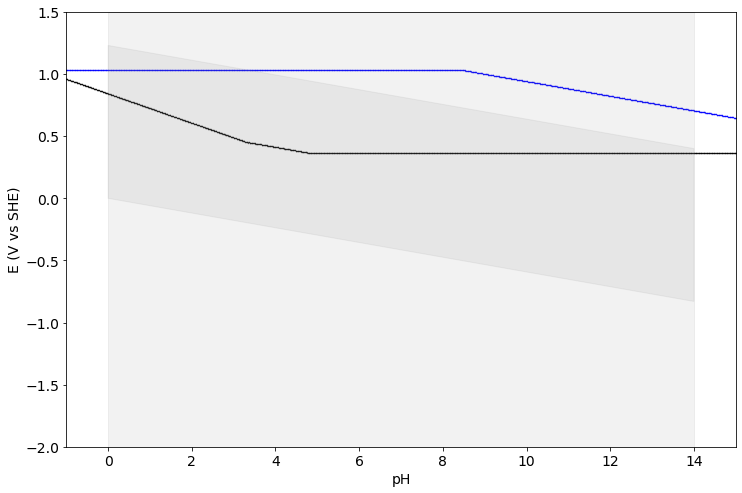

(41.0, 5, 3)

In [ ]:
#Bz
root = 'https://docs.google.com/spreadsheets/d/1RXYDzbcczdA4YfBc2kQRIcwTKKi_2q4dCDbcxksQANI/export?format=csv'
df=pd.read_csv(root)
pKas=fpKa(-265.6660, root)
print(pKas)

potentialf(-265.6660, 4.25, root, pKas)  


           0          1          2
0 -22.827472  -7.352842   4.501122
1  -9.438875  -0.506093   5.868816
2  -2.555335  12.739480  28.339198


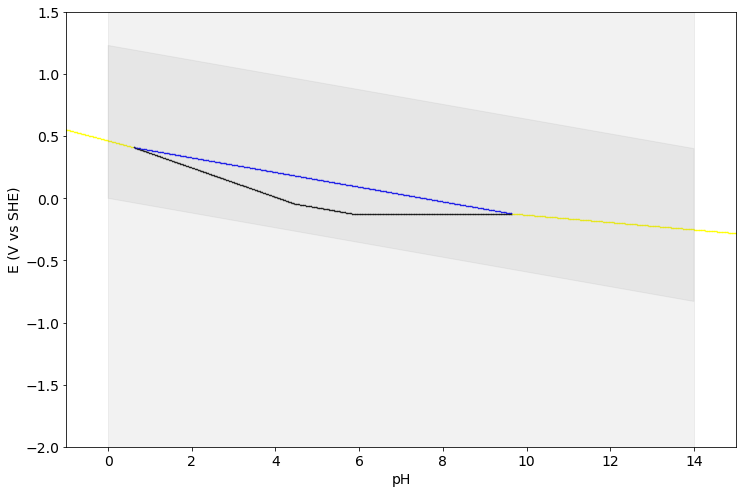

(30.0, 3, 3)

In [ ]:
#MB
root = 'https://docs.google.com/spreadsheets/d/1RXYDzbcczdA4YfBc2kQRIcwTKKi_2q4dCDbcxksQANI/export?format=csv'
df=pd.read_csv(root)
pKas=fpKa(-269.4238, root)
print(pKas)

potentialf(-269.4238, 4.2025, root, pKas) 

          0          1
0 -0.432296   7.600034
1  5.282220  22.743547


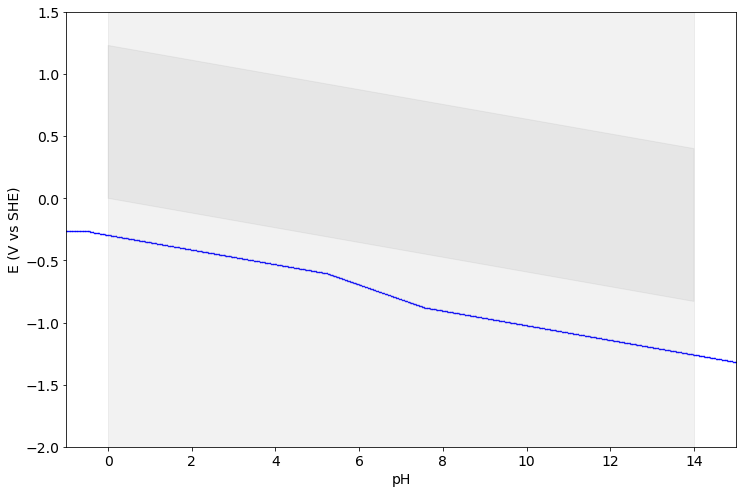

(24.0, 2, 2)

In [15]:
#Bpy
root = 'https://docs.google.com/spreadsheets/d/1RXYDzbcczdA4YfBc2kQRIcwTKKi_2q4dCDbcxksQANI/export?format=csv'
df=pd.read_csv(root)
pKas=fpKa(-270.8787, root)
print(pKas)

potentialf(-270.8787, 4.08845, root, pKas) 